## **Data Analysis Python Project - BLINKIT ANALYSIS**

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **Importing Raw Data**

In [2]:
df = pd.read_csv('D:\\Python\\Blinkit Analysis\\blinkit_data.csv')

#### **Sample Data**

In [3]:
 df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


#### **Size of Data**

In [4]:
print("rows = ",df.shape[0], "columns = ",df.shape[1])

rows =  8523 columns =  12


In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### **Data Cleaning**

In [7]:
 df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
  df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [9]:
 df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

#### **BUSINESS REQUIREMENTS**

##### **KPI's REQUIREMENTS**

In [10]:
#Total Sales
total_sales = df["Sales"].sum()

#Average Sales
average_sales = df["Sales"].mean()

#Number of Items Sold
no_of_items_sold = df["Item Type"].count()

#Average Rating
average_rating = df["Rating"].mean()

#Display

print(f"Total Sales : ${total_sales:,.1f}")
print(f"Average Sales : ${average_sales:,.1f}")
print(f"Number of Items Sold : {no_of_items_sold}")
print(f"Average Rating : {average_rating:.1f}")


Total Sales : $1,201,681.5
Average Sales : $141.0
Number of Items Sold : 8523
Average Rating : 4.0


##### **CHARTS REQUIREMENTS**

###### **Total Sales by Fat Content**

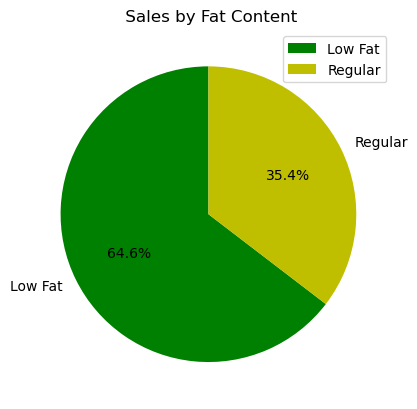

In [11]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()

plt.pie(sales_by_fat.values, labels=sales_by_fat.index, colors =['g','y'], autopct = '%1.1f%%', startangle = 90)
plt.title(" Sales by Fat Content")
plt.legend()
plt.show()

###### **Total Sales by Item Type**

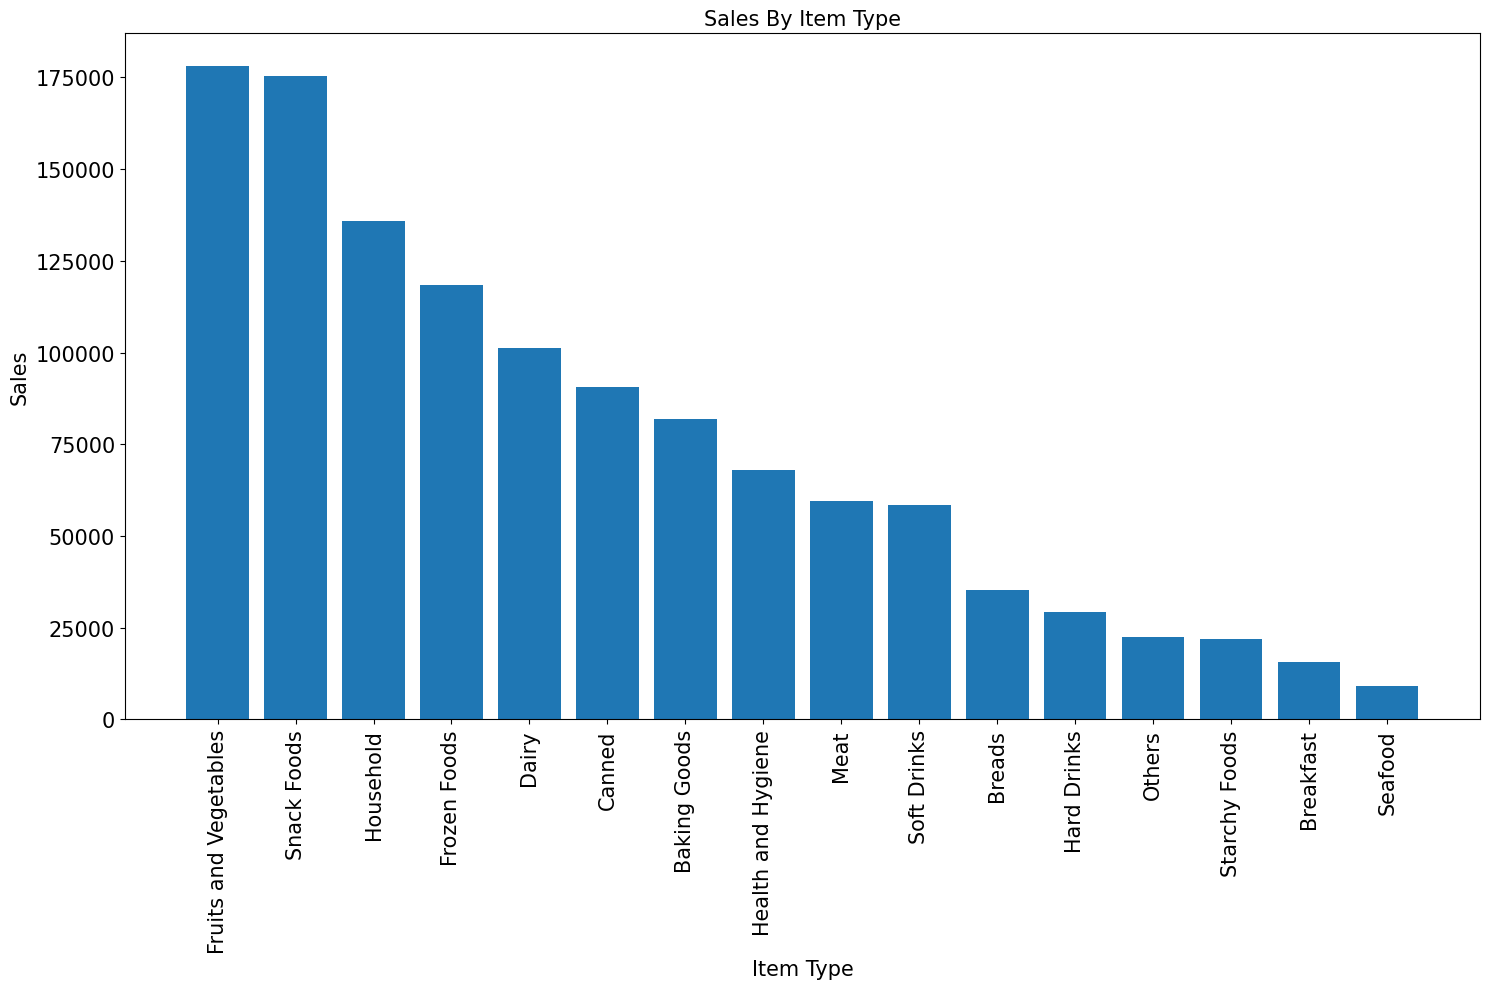

In [12]:
sales_by_item_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending =False)
plt.figure(figsize = (15,10))

plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Item Type", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.title("Sales By Item Type",  fontsize = 15)
plt.tight_layout()
plt.show()

###### **Fat Content by Outlet for Total Sales**

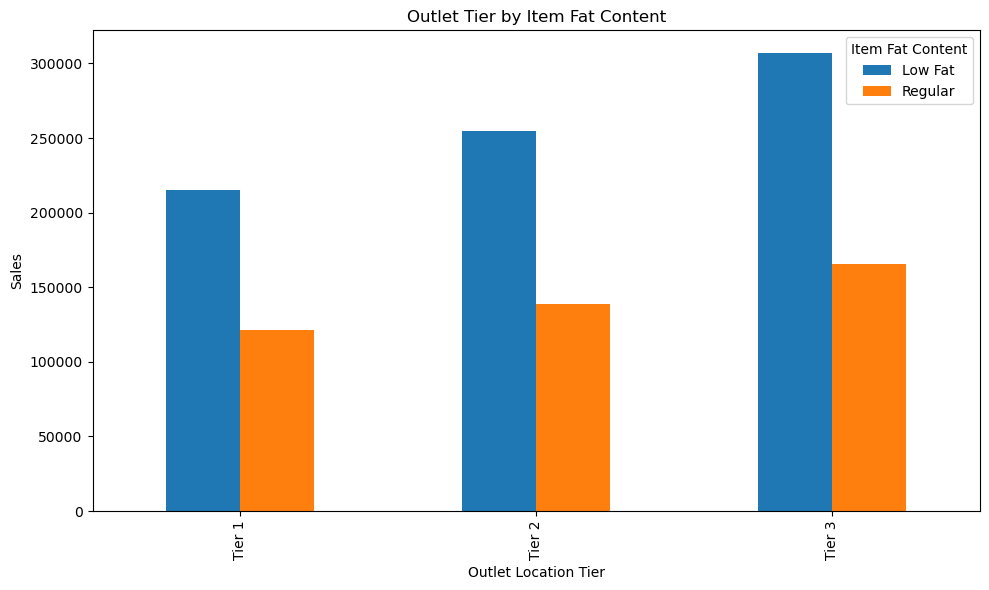

In [13]:
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()


grouped.plot(kind = 'bar', figsize = (10,6))
plt.title("Outlet Tier by Item Fat Content")
plt.xlabel("Outlet Location Tier")
plt.ylabel("Sales")
plt.legend(title = "Item Fat Content")
plt.tight_layout()
plt.show()

###### **Total Sales by Outlet Establishment**

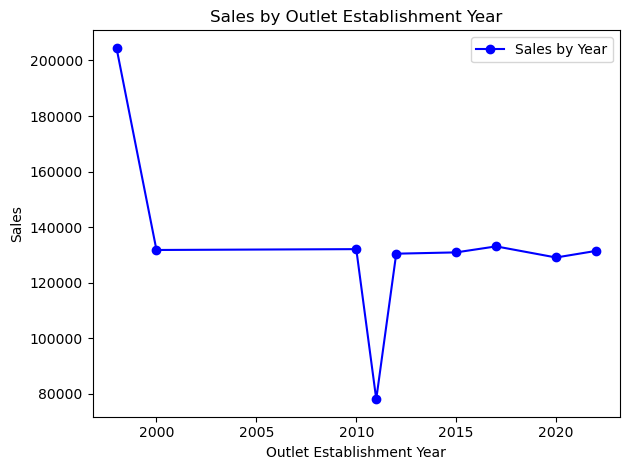

In [14]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum()

plt.plot(sales_by_year.index, sales_by_year.values, marker = "o", color="b", label ="Sales by Year")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Sales")
plt.title("Sales by Outlet Establishment Year")
plt.legend()
plt.tight_layout()
plt.show()

###### **Sales by Outlet Size**

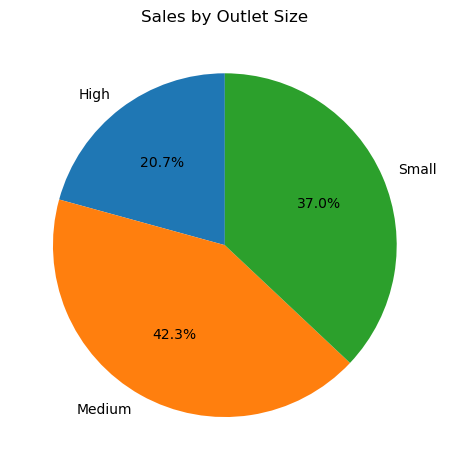

In [15]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()

plt.pie(sales_by_size.values, labels = sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.show()

###### **Sales by Outlet Location**

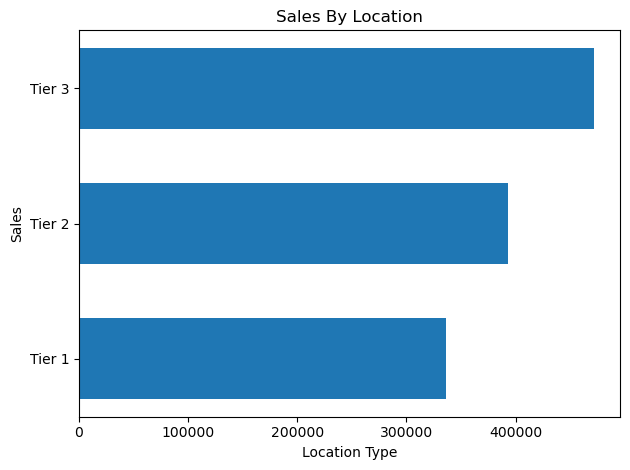

In [16]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum()
width = 0.6
plt.barh(sales_by_location.index, sales_by_location.values, width)
plt.title("Sales By Location")
plt.xlabel("Location Type")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()